Deep gauge (using Tensorflow to read gauges)

https://github.com/oci-labs/deep-gauge

In [123]:
import os
import numpy as np

from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [124]:
# Declare variables
# D:\StudyTime\ProgrammingWorld\CodeZone\Development\AI_ML\Python\PressureGaugeReader\Images\out2\ExtractedImages
GAUGE = "../Python/PressureGaugeReader/Images/GaugeDataGenerated/gauge.png"
DIAL = "../Python/PressureGaugeReader/Images/GaugeDataGenerated/dial.png"
NEEDLE = '../Python/PressureGaugeReader/Images/GaugeDataGenerated/needle.png'
NEEDLE_CENTER = '../Python/PressureGaugeReader/Images/GaugeDataGenerated/needle_center.png'

Synthetic Images - Correct Needle placement

Determine what angle the needle needs to be set to in order to display at the 0 gauge number.

Deter what angle the needle needs to be set to in order to display the 4 gauge reading.

Iterate over the range between the 0 angle and the 4 angle

Create the image with the labels in PSI instead of degrees.

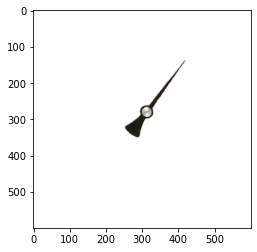

In [125]:
# Modify the image to set the needle at 0 degrees
image = Image.open(NEEDLE).convert('RGBA')
image_rot_90 = image.rotate(232, expand=False, resample=Image.BICUBIC)
# image_rot_90.save('needle_rot_0.png')
plt.imshow(image_rot_90)

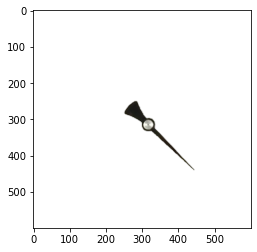

In [126]:
image_rot_134 = image.rotate(134, expand=False, resample=Image.BICUBIC)
plt.imshow(image_rot_134)

In [127]:
# image_rot_360 = image.rotate(360, expand=False, resample=Image.BICUBIC)
# plt.imshow(image_rot_360)

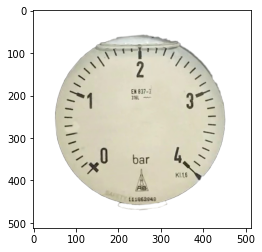

In [128]:
# Gauge background
image = Image.open(DIAL).convert('RGBA')
plt.imshow(image)

In [129]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

Creation of Needle images with manipulation and rotation

In [130]:
# Rotate all the images of needles 360 degrees
NEEDLE_DIR = "../Python/PressureGaugeReader/images/GaugeDataGenerated/needles/"
PATH = NEEDLE_DIR + "needle_rotation_{0}.png"
createFolder(NEEDLE_DIR)

def make_needles(angle):
    img = Image.open(NEEDLE)
    x = img.rotate(-angle, expand=True, resample=Image.BICUBIC)
    # crop the rotated image to the size of the original image
    x = x.crop(box=(x.size[0]/2 - img.size[0]/2,
               x.size[1]/2 - img.size[1]/2,
               x.size[0]/2 + img.size[0]/2,
               x.size[1]/2 + img.size[1]/2))
    
    filename = PATH.format(angle)

    x.save(filename)

for angle in range(0, 361):
    # print("skipped creation of needles")
    make_needles(angle)

Individual folder structure for Tensorflow training

In [131]:
# Create the folders for each of the gauge classes
PATH = '../Python/PressureGaugeReader/images/GaugeDataGenerated/tf_gauges/{0}'

m = range(0, 5)
n = range(1, 10)
# o = range(5, 10)

for idx, i in enumerate(m):
    createFolder(PATH.format(i))
    
    # # the gauge stops at 4
    # if(i != 4):
    #     # loop through 0.5 - 1
    #     for kdx, k in enumerate(o):
    #         pre_one = "{0}-{1}".format(i,k)
    #         createFolder(PATH.format(pre_one))
        
    # loop through 0 - 4
    # if(i >= 1 and i < 4):
    whole = "{0}".format(i)
    createFolder(PATH.format(whole))
    
    # Loop through #.1 = #.9
    if(i != 4):
        for jdx, j in enumerate(n):
            decimal = "{0}-{1}".format(i,j)
            createFolder(PATH.format(decimal))

Generate synthetic gauges and save for Tensorflow training

In [132]:
NEEDLES_PATH = "../Python/PressureGaugeReader/images/GaugeDataGenerated/needles/needle_rotation_{0}.png"
TF_GAUGES = "../Python/PressureGaugeReader/images/GaugeDataGenerated/tf_gauges/{0}"
EDA_GAUGES = "../Python/PressureGaugeReader/images/GaugeDataGenerated/gauges/{0}"

def save_gauge(item, num):
    img_gauge = Image.open(DIAL, 'r')

    filename = NEEDLES_PATH.format(item)
    img_needle = Image.open(filename, 'r')
    img_copy = img_gauge.copy()

    img_copy.paste(img_needle.convert('L'), (-28, -38), img_needle.convert('RGBA'))
    
    # Save the synthetic image to the class folder
    string_num = str(num)
    dash = string_num.replace(".","-")
    folder = TF_GAUGES.format(dash)

    # Save PNG for data Augmentation
    gauge_name = "{0}/gauge.png"
    filename_save = gauge_name.format(folder)
    img_copy.save(filename_save)

    # Save PNG for EDA
    createFolder('../Python/PressureGaugeReader/images/GaugeDataGenerated/gauges')
    eda_name = "gauge_{0}.png".format(dash)
    img_copy.save( EDA_GAUGES.format(eda_name) )

def iterate_gauge(mapping):
    for idx, item in enumerate(mapping):
        save_gauge(mapping[item], item)

In [133]:
# # Define a mapping between degrees in circle and gauge readings
# gaugeDegreeMap = {
#     0:231, 0.1:244, 0.2:246, 0.3:248, 0.4:249, 0.5:0, 0.6:235, 0.7:237, 0.8:239, 0.9:241,
#     1:243, 1.1:244, 1.2:246, 1.3:248, 1.4:249, 1.5:250, 1.6:253, 1.7:255, 1.8:257, 1.9:259,
#     2:260, 2.1:262, 2.2:264, 2.3:266, 2.4:268, 2.5:270, 2.6:271, 2.7:273, 2.8:275, 2.9:277,
#     3:279, 3.1:280, 3.2:282, 3.3:284, 3.4:286, 3.5:287, 3.6:290, 3.7:291, 3.8:293, 3.9:295,
#     4:297
# }

# Define a mapping between degrees in circle and gauge readings
gaugeDegreeMap = {
    0:322 , 0.1:328, 0.2:334, 0.3:340, 0.4:346, 0.5:352, 0.6:359, 0.7:5, 0.8:11, 0.9:17,
    1:23, 1.1:29, 1.2:35, 1.3:41, 1.4:47, 1.5:53, 1.6:60, 1.7:66, 1.8:72, 1.9:78,
    2:90, 2.1:96, 2.2:102, 2.3:108, 2.4:114, 2.5:120, 2.6:126, 2.7:132, 2.8:138, 2.9:144,
    # 3:279, 3.1:280, 3.2:282, 3.3:284, 3.4:286, 3.5:287, 3.6:290, 3.7:291, 3.8:293, 3.9:295,
    4:297
}

In [134]:
# Iterate through the lookup map
iterate_gauge(gaugeDegreeMap)

Data Augmentation Techniques

    Scaling
    Translation
    Rotation (at 90 degrees)
    Rotation (at finer angles)
    Flipping
    Adding Salt and Pepper noise
    Lighting condition
    Perspective transform

In [135]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import os
import cv2
from math import floor, ceil, pi
import scipy
import glob

%matplotlib inline

In [136]:
IMAGE_SIZE = 224

# Image Resizing
def tf_resize_images(X_img_file_paths):
    X_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, (None, None, 3))
    tf_img = tf.image.resize_images(X, (IMAGE_SIZE, IMAGE_SIZE), 
                                    tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        # Each image is resized individually as different image may be of different size.
        for index, file_path in enumerate(X_img_file_paths):
            img = mpimg.imread(file_path)[:, :, :3] # Do not read alpha channel.
            resized_img = sess.run(tf_img, feed_dict = {X: img})
            X_data.append(resized_img)

    X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    return X_data

Scaling:

In [137]:
def central_scale_images(X_imgs, scales):
    # Various settings needed for Tensorflow operation
    boxes = np.zeros((len(scales), 4), dtype = np.float32)
    for index, scale in enumerate(scales):
        x1 = y1 = 0.5 - 0.5 * scale # To scale centrally
        x2 = y2 = 0.5 + 0.5 * scale
        boxes[index] = np.array([y1, x1, y2, x2], dtype = np.float32)
    box_ind = np.zeros((len(scales)), dtype = np.int32)
    crop_size = np.array([IMAGE_SIZE, IMAGE_SIZE], dtype = np.int32)
    
    X_scale_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (1, IMAGE_SIZE, IMAGE_SIZE, 3))
    # Define Tensorflow operation for all scales but only one base image at a time
    tf_img = tf.image.crop_and_resize(X, boxes, box_ind, crop_size)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for img_data in X_imgs:
            batch_img = np.expand_dims(img_data, axis = 0)
            scaled_imgs = sess.run(tf_img, feed_dict = {X: batch_img})
            X_scale_data.extend(scaled_imgs)
    
    X_scale_data = np.array(X_scale_data, dtype = np.float32)
    return X_scale_data

Translation:

In [138]:
from math import ceil, floor

def get_translate_parameters(index):
    if index == 0: # Translate left 20 percent
        offset = np.array([0.0, 0.2], dtype = np.float32)
        size = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        w_start = 0
        w_end = int(ceil(0.8 * IMAGE_SIZE))
        h_start = 0
        h_end = IMAGE_SIZE
    elif index == 1: # Translate right 20 percent
        offset = np.array([0.0, -0.2], dtype = np.float32)
        size = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        w_start = int(floor((1 - 0.8) * IMAGE_SIZE))
        w_end = IMAGE_SIZE
        h_start = 0
        h_end = IMAGE_SIZE
    elif index == 2: # Translate top 20 percent
        offset = np.array([0.2, 0.0], dtype = np.float32)
        size = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        w_start = 0
        w_end = IMAGE_SIZE
        h_start = 0
        h_end = int(ceil(0.8 * IMAGE_SIZE)) 
    elif index == 3: # Translate bottom 20 percent
        offset = np.array([-0.2, 0.0], dtype = np.float32)
        size = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        w_start = 0
        w_end = IMAGE_SIZE
        h_start = int(floor((1 - 0.8) * IMAGE_SIZE))
        h_end = IMAGE_SIZE
    elif index == 4: # Translate left 10 percent
        offset = np.array([0.0, 0.1], dtype = np.float32)
        size = np.array([IMAGE_SIZE, ceil(0.9 * IMAGE_SIZE)], dtype = np.int32)
        w_start = 0
        w_end = int(ceil(0.9 * IMAGE_SIZE))
        h_start = 0
        h_end = IMAGE_SIZE
    elif index == 5: # Translate right 10 percent
        offset = np.array([0.0, -0.1], dtype = np.float32)
        size = np.array([IMAGE_SIZE, ceil(0.9 * IMAGE_SIZE)], dtype = np.int32)
        w_start = int(floor((1 - 0.9) * IMAGE_SIZE))
        w_end = IMAGE_SIZE
        h_start = 0
        h_end = IMAGE_SIZE 
    elif index == 6: # Translate top 10 percent
        offset = np.array([0.1, 0.0], dtype = np.float32)
        size = np.array([ceil(0.9 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        w_start = 0
        w_end = IMAGE_SIZE
        h_start = 0
        h_end = int(ceil(0.9 * IMAGE_SIZE))  
    elif index == 7: # Translate bottom 10 percent
        offset = np.array([-0.1, 0.0], dtype = np.float32)
        size = np.array([ceil(0.9 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        w_start = 0
        w_end = IMAGE_SIZE
        h_start = int(floor((1 - 0.9) * IMAGE_SIZE))
        h_end = IMAGE_SIZE      
        
    return offset, size, w_start, w_end, h_start, h_end

def translate_images(X_imgs):
    offsets = np.zeros((len(X_imgs), 2), dtype = np.float32)
    n_translations = 8
    X_translated_arr = []
    
    tf.reset_default_graph()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(n_translations):
            X_translated = np.zeros((len(X_imgs), IMAGE_SIZE, IMAGE_SIZE, 3), 
				    dtype = np.float32)
            X_translated.fill(1.0) # Filling background color
            base_offset, size, w_start, w_end, h_start, h_end = get_translate_parameters(i)
            offsets[:, :] = base_offset 
            glimpses = tf.image.extract_glimpse(X_imgs, size, offsets)
            
            glimpses = sess.run(glimpses)
            X_translated[:, h_start: h_start + size[0], \
			 w_start: w_start + size[1], :] = glimpses
            X_translated_arr.extend(X_translated)
    X_translated_arr = np.array(X_translated_arr, dtype = np.float32)
    return X_translated_arr